In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
conda install numpy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
app_df = pd.read_csv("Fall2021/Intro-to-DS/Final_Project/application_data.csv")

In [4]:
#missing data 
missing_fractions = app_df.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
dtype: float64

# 1.Drop features 

# Limit the Feature Space
The full dataset has 122 features for each loan. We'll select features in two steps:

1. Drop features with more than 30% of their data missing.
2. Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# 1.1 Drop features missing more than 30% percent data

In [6]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
app_df.drop(labels=drop_list, axis=1, inplace=True)

# Columns of choice

In [7]:
#useless columns:
["SK_ID_CURR"]
app_df.drop(labels=["SK_ID_CURR"], axis=1, inplace=True)

# Pearson correlation matrix

In [8]:
# indicator (dummy variable) whether the applicant provided ...
Flag=['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [9]:
app_df_2=app_df.drop(labels=Flag, axis=1)

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

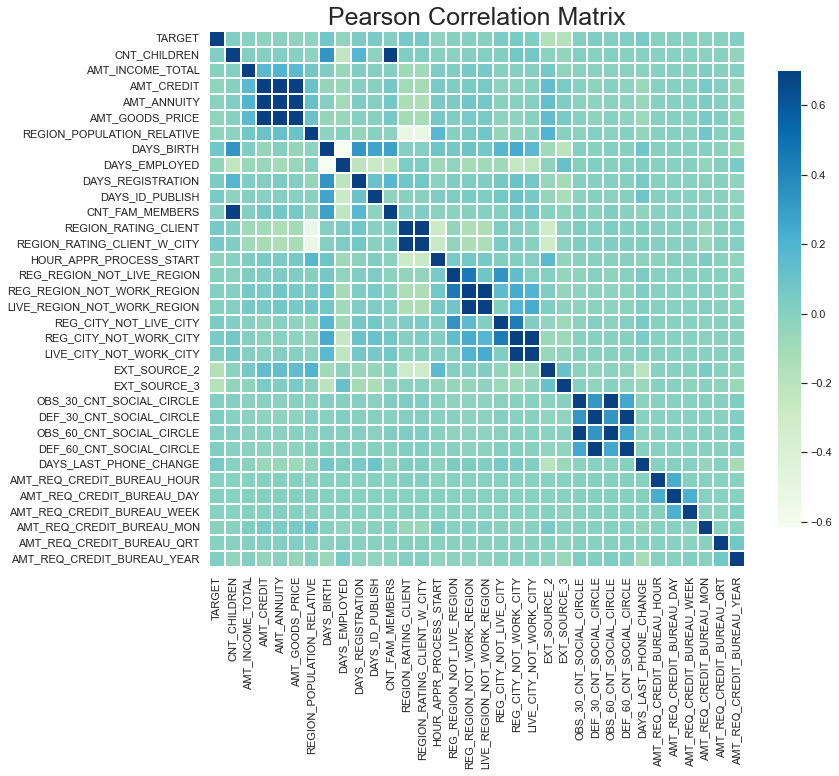

In [10]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(app_df_2.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=False, cbar_kws={"shrink": .7})

In [11]:
drop_list_2=['AMT_ANNUITY','AMT_GOODS_PRICE','REGION_RATING_CLIENT']

In [12]:
app_df.drop(labels=drop_list_2, axis=1, inplace=True)

# For linear model only, other team member please delete this part(2. Multicollinearity) in your code!
# 2. Multicollinearity 
Although highly correlated features (multicollinearity) aren't a problem for the machine learning models based on decision trees (as used here), these features decrease importances of each other and can make feature analysis more difficult. Therefore, I calculate feature correlations and remove the features with very high correlation coefficients before applying machine learning.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
#column that doesn't contain object input
value_column=[]
for i in range(app_df.shape[1]):
    if type(app_df.iloc[1,i])!=str:
        value_column.append(i)

In [15]:
app_df_3=app_df.iloc[:,value_column]

In [16]:
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# X=app_df_3.drop(labels=['TARGET'],axis=1)
# #use the following line if you don't want to see the warning
# #X=app_df_3.drop(labels=['FLAG_DOCUMENT_2'],axis=1).drop(labels=['TARGET'],axis=1)
# X=X.dropna()
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [17]:
app_df_3=app_df_3.drop(labels=['FLAG_MOBIL','FLAG_EMP_PHONE','OBS_60_CNT_SOCIAL_CIRCLE'], axis=1)

# 3. Your code

## Linear Regression

In [18]:
#  one-hot encoding is not necessary for some models! Please be aware.
app_df=pd.get_dummies(app_df)

In [19]:
app_df_3.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#use a smaller data set first.
app_df_3 = app_df_3.sample(frac = 0.3)

In [20]:
#app_df is for everyone and app_df_3 is for linear model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

app_df_3 = app_df_3.dropna()
X = app_df_3.drop('TARGET', axis=1)
y = app_df_3['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=235)

In [22]:
#Linear Regression on all columns
lr1 = LinearRegression().fit(X_train, y_train)

print("Testing for all the columns:")
print(f"R2 values for the train set: {lr1.score(X_train,y_train)}")
print(f"MSE value for the train set: {mean_squared_error(y_train,lr1.predict(X_train))}")
print(f"R2 values for the test set: {lr1.score(X_test, y_test)}")
print(f"MSE value for the test set: {mean_squared_error(y_test,lr1.predict(X_test))}\n")

Testing for all the columns:
R2 values for the train set: 0.0550486588843907
MSE value for the train set: 0.0678515577130185
R2 values for the test set: 0.05447292911540291
MSE value for the test set: 0.06741089966889216



In [23]:
#Linear Regression on all polynomial expansions of the features for degree <= 2
poly_transform = PolynomialFeatures(2)
poly = poly_transform.fit(X_train)
p_train_X = poly.transform(X_train)
p_test_X = poly.transform(X_test)

lr2 = LinearRegression().fit(p_train_X, y_train)

print("Testing for all polynomial expansions of the features for degree <= 2")
print(f"R2 values for the train set: {lr2.score(p_train_X,y_train)}")
print(f"MSE value for the train set: {mean_squared_error(y_train,lr2.predict(p_train_X))}")
print(f"R2 values for the test set: {lr2.score(p_test_X, y_test)}")
print(f"MSE value for the test set: {mean_squared_error(y_test,lr2.predict(p_test_X))}")

Testing for all polynomial expansions of the features for degree <= 2
R2 values for the train set: 0.04516343578842952
MSE value for the train set: 0.06856135911359623
R2 values for the test set: -9.041566543659417
MSE value for the test set: 0.7159086774319835


In [24]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, lr1.predict(X_test))

0.05448657004394175

### Ridge Regression

In [25]:
#Ridge Regression
import warnings
from scipy.linalg import LinAlgWarning
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore", category=LinAlgWarning)

alphaval = 1 # ridge regression parameter alpha
ridge = Ridge(alpha=alphaval).fit(p_train_X,y_train)
alphaval2 = 10**3 # ridge regression parameter alpha
ridge2 = Ridge(alpha=alphaval2).fit(p_train_X,y_train)

In [26]:
text_errors = ['MSE of  linear regression:','MSE of linear regression, polynomial features:',\
                    'MSE of ridge regression, alpha = '+ str(alphaval)+', polynomial features:',\
                    'MSE of ridge regression, alpha = '+ str(alphaval2)+', polynomial features:']
trainerrors_list = [mean_squared_error(lr1.predict(X_test), y_test), mean_squared_error(lr2.predict(p_test_X), y_test),\
                    mean_squared_error(ridge.predict(p_test_X), y_test),\
                    mean_squared_error(ridge2.predict(p_test_X), y_test)]
text_r2 = ['R2, linear regression:','R2 of linear regression, polynomial features:',\
           'R2 of ridge regression, alpha = '+ str(alphaval)+', polynomial features:',\
           'R2 of ridge regression, alpha = '+ str(alphaval2)+', polynomial features:']
r2_train_list = [lr1.score(X,y), lr2.score(p_train_X, y_train), \
                 ridge.score(p_train_X, y_train),ridge2.score(p_train_X, y_train)]

pd.options.display.max_colwidth = 100
print(pd.DataFrame(trainerrors_list, index=text_errors, columns=['']))
print(pd.DataFrame(r2_train_list, index=text_r2, columns=['']))

                                                                     
MSE of  linear regression:                                   0.067411
MSE of linear regression, polynomial features:               0.715909
MSE of ridge regression, alpha = 1, polynomial features:     0.949618
MSE of ridge regression, alpha = 1000, polynomial features:  0.885548
                                                                    
R2, linear regression:                                      0.054878
R2 of linear regression, polynomial features:               0.045163
R2 of ridge regression, alpha = 1, polynomial features:     0.083583
R2 of ridge regression, alpha = 1000, polynomial features:  0.069086


In [27]:
def computeScoresMSE(model,alphas,train_X,train_y,test_X,test_y):
    train_scores = np.empty_like(alphas)
    test_scores = np.empty_like(alphas)
    test_MSE    = np.empty_like(alphas)
    train_MSE   = np.empty_like(alphas)
    models = []
    for i in range(alphas.size):
        models.append(model(alpha=alphas[i]))
        models[i].fit(train_X,train_y)
        train_scores[i] = models[i].score(train_X, train_y)
        test_scores[i]  = models[i].score(test_X, test_y)
        test_MSE[i]     = np.mean((test_y-models[i].predict(test_X))**2)
        train_MSE[i]    = np.mean((train_y-models[i].predict(train_X))**2)
    index = np.argmin(test_MSE)
    best_model = models[index]
    return train_MSE, test_MSE, train_scores, test_scores, best_model

In [28]:
alphas = np.logspace(-2,6,num=60) # create numpy array of logarithmically interpolated values between 10^(-2) and 10^(6)
alphas

array([1.00000000e-02, 1.36644835e-02, 1.86718109e-02, 2.55140652e-02,
       3.48636523e-02, 4.76393801e-02, 6.50967523e-02, 8.89513497e-02,
       1.21547425e-01, 1.66088278e-01, 2.26951054e-01, 3.10116893e-01,
       4.23758716e-01, 5.79044398e-01, 7.91234262e-01, 1.08118075e+00,
       1.47737765e+00, 2.01876025e+00, 2.75853162e+00, 3.76939098e+00,
       5.15067808e+00, 7.03813555e+00, 9.61724871e+00, 1.31414736e+01,
       1.79571449e+01, 2.45375111e+01, 3.35292415e+01, 4.58159767e+01,
       6.26051657e+01, 8.55467254e+01, 1.16895182e+02, 1.59731228e+02,
       2.18264473e+02, 2.98247129e+02, 4.07539297e+02, 5.56881399e+02,
       7.60949669e+02, 1.03979842e+03, 1.42083083e+03, 1.94149195e+03,
       2.65294846e+03, 3.62511705e+03, 4.95353521e+03, 6.76875001e+03,
       9.24914728e+03, 1.26384820e+04, 1.72698329e+04, 2.35983347e+04,
       3.22459055e+04, 4.40623643e+04, 6.02089449e+04, 8.22724134e+04,
       1.12421004e+05, 1.53617495e+05, 2.09910372e+05, 2.86831681e+05,
      

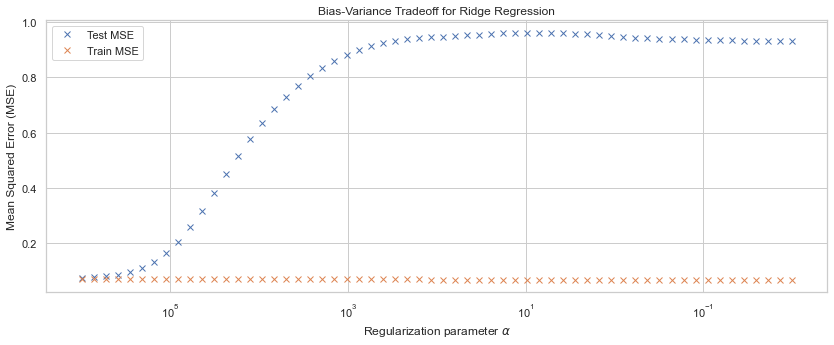

Model with optimal regularization parameter alpha:  Ridge(alpha=1000000.0)
Best test MSE:  0.07209964213792092


(0.07209964213792092, 0.07209964213792092)

In [29]:
train_MSE, test_MSE, train_scores, test_scores, Ridge_opt = \
    computeScoresMSE(Ridge, alphas, p_train_X, y_train, p_test_X, y_test)
plt.figure(figsize=(14,5))
plt.semilogx(alphas,test_MSE,'x',label="Test MSE")
plt.semilogx(alphas,train_MSE,'x',label="Train MSE")
plt.xlabel(r"Regularization parameter $\alpha$")
plt.ylabel(r"Mean Squared Error (MSE)")
plt.title("Bias-Variance Tradeoff for Ridge Regression")
ax = plt.gca()
ax.invert_xaxis()
plt.legend()
plt.show()

print("Model with optimal regularization parameter alpha: ",Ridge_opt)
print("Best test MSE: ",min(test_MSE)) # compare with np.mean((test_y-Ridge_opt.predict(test_X))**2)
(min(test_MSE) , np.mean((y_test-Ridge_opt.predict(p_test_X))**2))

In [31]:
# Check the calculation of R2:
y_test_avg = np.mean(y_test)
rsquared = 1 - np.linalg.norm(y_test-Ridge_opt.predict(p_test_X))**2 / np.linalg.norm(y_test-y_test_avg)**2
(max(test_scores),rsquared)

(-0.011292888499383036, -0.011292888499379705)

In [32]:
Ridge_opt.coef_

array([ 0.00000000e+00,  5.55142270e-06,  2.34551995e-08, ...,
        3.13648527e-05, -1.02191792e-04,  2.59923403e-04])

### LASSO

In [33]:
#LASSO
import warnings
from sklearn.linear_model import Lasso
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning) # this is to suppress warnings related to the optimization in the training of Lasso

train_MSE, test_MSE, train_scores, test_scores, Lasso_opt = \
    computeScoresMSE(Lasso,alphas,p_train_X,y_train,p_test_X,y_test)
plt.figure(figsize=(14,5))
plt.semilogx(alphas,test_MSE,'x',label="Test MSE")
plt.semilogx(alphas,train_MSE,'x',label="Train MSE")
plt.xlabel(r"Regularization parameter $\alpha$")
plt.ylabel(r"Mean Squared Error (MSE)")
plt.title("Bias-Variance Tradeoff for Lasso Regression")
ax = plt.gca()
ax.invert_xaxis()
plt.legend()
plt.show()

print("Model with optimal regularization parameter alpha: ",Lasso_opt)
print("Best test MSE: ",np.mean((y_test-Lasso_opt.predict(p_test_X))**2))

KeyboardInterrupt: 

In [ ]:
Lasso_opt.coef_

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Ridge Regression
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.1,normalize=True)

ridgeReg.fit(p_train_X,y_train)

pred1 = ridgeReg.predict(p_test_X)

# R-square of Ridge
print('R-square of Ridge Regression model')
print('{:<15} {}'.format('R-square:', ridgeReg.score(p_test_X, y_test, sample_weight=None)),'\n')

# LASSO Regression
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1,normalize=True)

lassoReg.fit(p_train_X,y_train)

pred2 = lassoReg.predict(p_test_X)

# R-square of LASSO
print('R-square of LASSO Regression model')
print('{:<15} {}'.format('R-square:', lassoReg.score(p_test_X,y_test,sample_weight=None)),'\n')

# var, bias, mse
mse1, bias1, var1 = bias_variance_decomp(ridgeReg, p_train_X, y_train, p_test_X, y_test, loss='mse', num_rounds=10, random_seed=111)
mse2, bias2, var2 = bias_variance_decomp(lassoReg, p_train_X, y_train, p_test_X, y_test, loss='mse', num_rounds=10, random_seed=111)
print('Ridge Regression model')
print('{:<15} {}'.format('MSE:', mse1))
print('{:<15} {}'.format('bias:', bias1))
print('{:<15} {}'.format('variance:', var1),'\n')

print('LASSO Regression model')
print('{:<15} {}'.format('MSE:', mse2))
print('{:<15} {}'.format('bias:', bias2))
print('{:<15} {}'.format('variance:', var2),'\n')

In [ ]:
# plot the magnitude of coefficients
import pandas as pd
import matplotlib.pyplot as plt

# coefficient plot of Ridge model, different alpha
figure,axes = plt.subplots(2,2,figsize=(15,15))

axes = axes.ravel()

coef_list1 = []

c = [0.01,0.05,0.1,3]
for i in c:
    ridgeReg = Ridge(alpha=i,normalize=True)
    ridgeReg.fit(X_train,y_train)
    coef_list1.append(pd.Series(ridgeReg.coef_,labels).sort_values())
# different alpha in Ridge regression
for j in range(0,4):
    coef_list1[j].plot(ax = axes[j] ,kind='bar', title='Ridge Coefficients \n alpha = {}'.format(c[j])) 
    
# coefficient plot of LASSO model, different alpha
figure,axes = plt.subplots(2,2,figsize=(15,15))

axes = axes.ravel()

coef_list2 = []

c = [0.01,0.05,0.1,3]
for i in c:
    lassoReg = Lasso(alpha=i,normalize=True)
    lassoReg.fit(X_train,y_train)
    coef_list2.append(pd.Series(lassoReg.coef_,labels).sort_values())
# different alpha in LASSO regression
for j in range(0,4):
    coef_list2[j].plot(ax = axes[j] ,kind='bar', title='LASSO Coefficients \n alpha = {}'.format(c[j])) 

plt.show()

## Logistic Regression

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
app_df = app_df.sample(frac = 0.3)
app_df = app_df.dropna()
X2 = app_df.drop('TARGET', axis=1)
y2 = app_df['TARGET']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.3,random_state=235)

X2_train = X2_train.values
X2_test = X2_test.values
y2_train = y2_train.values
y2_test = y2_test.values

NameError: name 'app_df' is not defined

In [30]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X2, y2):
    print("Train:", train_index, "Test:", test_index)
    X2_train, X2_test = X2.iloc[train_index,:], X2.iloc[test_index,:]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

Train: [ 49047  49048  49049 ... 245365 245366 245367] Test: [    0     1     2 ... 49341 49344 49354]
Train: [     0      1      2 ... 245365 245366 245367] Test: [49047 49048 49049 ... 98241 98242 98243]
Train: [     0      1      2 ... 245365 245366 245367] Test: [ 96986  96989  97025 ... 147361 147362 147363]
Train: [     0      1      2 ... 245365 245366 245367] Test: [145603 145619 145624 ... 196405 196406 196407]
Train: [     0      1      2 ... 196405 196406 196407] Test: [195128 195133 195148 ... 245365 245366 245367]


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear').fit(X2_train,y2_train)

logreg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_logreg = RandomizedSearchCV(LogisticRegression(solver='liblinear'), logreg_params, n_iter=4).fit(X2_train,y2_train)

In [33]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [34]:
for train, test in sss.split(X2_train, y2_train):
    best_est = rand_logreg.best_estimator_
    prediction = best_est.predict(X2_train[test])

    accuracy_lst.append(logreg.score(X2_train[test],y2_train[test]))
    precision_lst.append(precision_score(y2_train[test], prediction))
    recall_lst.append(recall_score(y2_train[test], prediction))
    f1_lst.append(f1_score(y2_train[test], prediction))
    auc_lst.append(roc_auc_score(y2_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [35]:
def classification_map(X,y,classifier,i=0,j=1,X_test=None,y_test=None,h=0.1):
    '''
    h: step size in the mesh
    i: first feature number to be plotted
    j: second feature number to be plotted
    '''
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
# Points in a mesh of [x_min, m_max] x [y_min, y_max]
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    classifier.fit(X,y)
    Z = classifier.predict(grid)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    # Plot also the training points
    plt.scatter(X[:,i], X[:,j], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with classifier "+str(classifier))
    if not X_test is None and not y_test is None: # if test set features are provided, overlay classified labels on test set as well
        plt.scatter(X_test[:,i], X_test[:,j], c=y_test,cmap=cmap_bold,marker="x")
    ax=plt.gca()
    #ax.legend(["training data","test data"],loc=0,fontsize=8)

In [36]:


# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X2_train, y2_train)

LogisticRegression(C=100000.0)

In [38]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X2_train[:, 0].min() - 0.5, X2_train[:, 0].max() + 0.5
y_min, y_max = X2_train[:, 1].min() - 0.5, X2_train[:, 1].max() + 0.5

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

figure(figsize=(4,4))
contourf(xx,yy,Z, cmap=plt.cm.Spectral_r)
scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.gray)
plt.show()

In [ ]:
classification_map(x,y,logreg)

# cross validation  and tune parameters
# need the following 
 precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report